# Preparación del entorno

## Importar librerias y crear carpeta

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

os.makedirs('plots', exist_ok=True)
os.makedirs('plots/cruce_eph_presupuesto', exist_ok=True)

## Cargar datos

In [6]:
file_path = "data/eph/General_concatenado_interp.csv"
eph = pd.read_csv(file_path)

eph = eph[eph['Año'] != 2011]

file_path = "data/presupuesto/resultados_anual_trabajo.csv"

presupuesto = pd.read_csv(file_path)

total_pagado_trabajo_por_año = {}
for index, row in presupuesto.iterrows():
    año = row['Año']
    total_pagado_trabajo_por_año[año] = row['total_pagado_trabajo']
    
    
desempleo = eph['Tasa.Desempleo'].reset_index(drop=True)
desempleo.name = 'Desempleo'

subocupacion = eph['Tasa.Subocupados'].reset_index(drop=True)
subocupacion.name = 'Subocupación'

informalidad = eph['Tasa.Informalidad'].reset_index(drop=True)
informalidad.name = 'Informalidad'

empleo = eph['Tasa.Empleo'].reset_index(drop=True)
empleo.name = 'Empleo'

actividad = eph['Tasa.Actividad'].reset_index(drop=True)
actividad.name = 'Actividad'

tasas = [desempleo, subocupacion, informalidad, empleo, actividad]

# Convertir porcentaje_por_año a una Serie de pandas con el mismo índice que actividad
porcentajes = pd.Series([total_pagado_trabajo_por_año[año]
                        for año in eph['Año'].unique() if año in total_pagado_trabajo_por_año])


# Procesamiento de los datos

## Cálculo de la correlación de Pearson entre las tasas analizadas y el crédito pagado con función trabajo por año

<!-- TODO -->

In [7]:
# Calcular la correlación de Pearson entre las tasas y el crédito pagado con función "Trabajo"
correlaciones = {}
for tasa in tasas:
    print(f'Correlación de Pearson para la tasa de {
          tasa.name.lower()} y el crédito pagado con función trabajo:')
    correlaciones[tasa.name] = tasa.corr(porcentajes, method='pearson')
    print("    ", f"{correlaciones[tasa.name]:.3f}")

Correlación de Pearson para la tasa de desempleo y el crédito pagado con función trabajo:
     -0.796
Correlación de Pearson para la tasa de subocupación y el crédito pagado con función trabajo:
     -0.577
Correlación de Pearson para la tasa de informalidad y el crédito pagado con función trabajo:
     -0.418
Correlación de Pearson para la tasa de empleo y el crédito pagado con función trabajo:
     -0.081
Correlación de Pearson para la tasa de actividad y el crédito pagado con función trabajo:
     -0.596


# Generación de gráficos

## Gráficos de correlación entre las tasas analizadas y los valores de crédito pagado con función trabajo por año

<!-- TODO -->

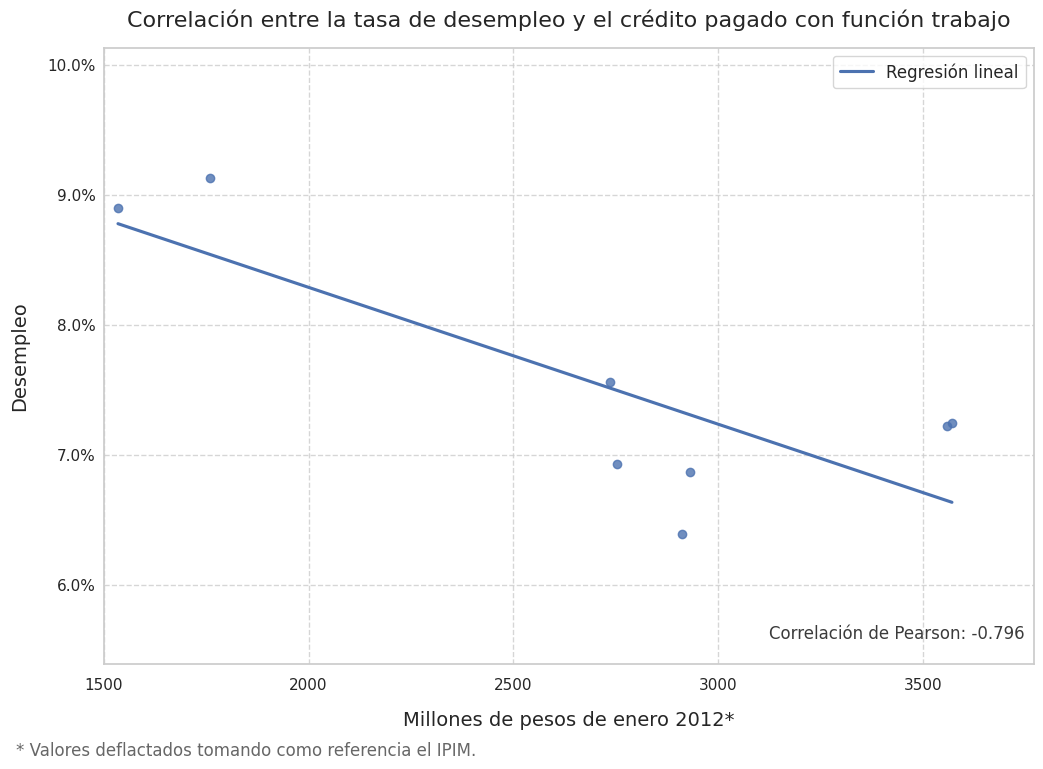

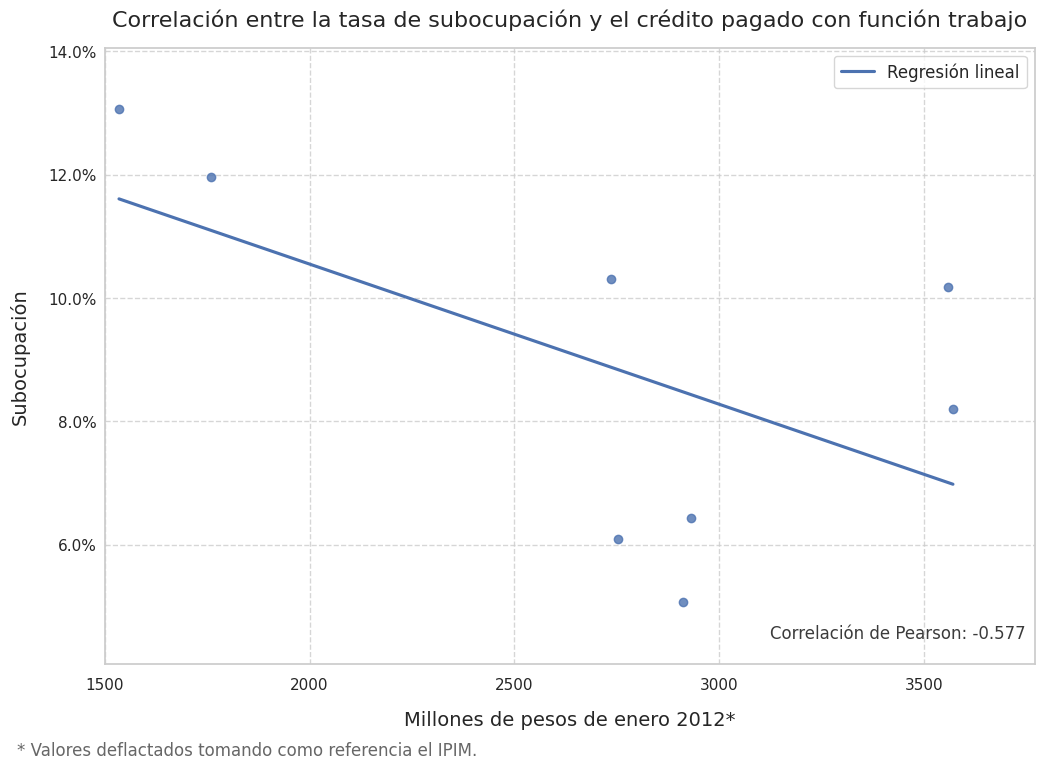

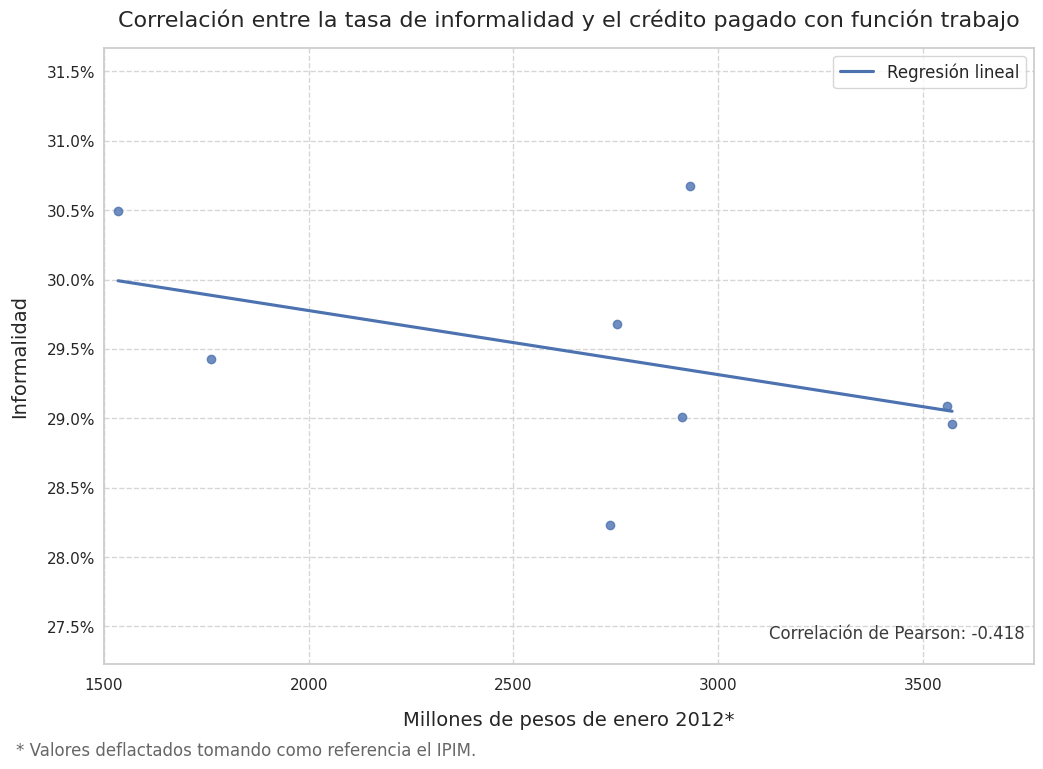

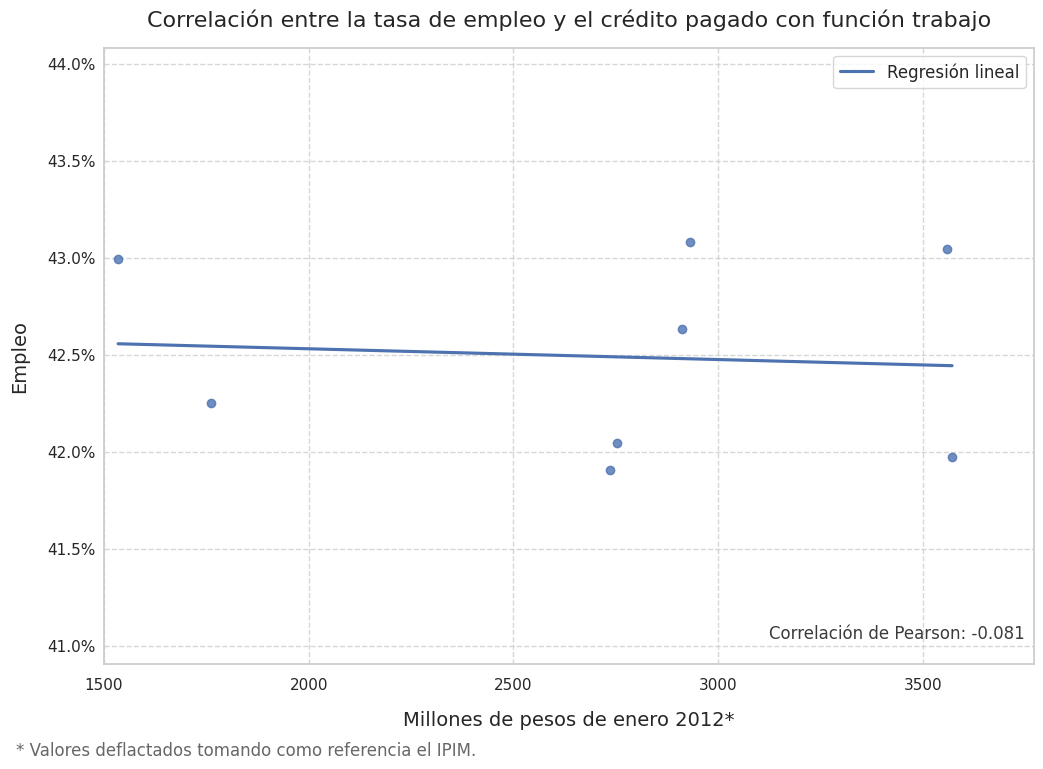

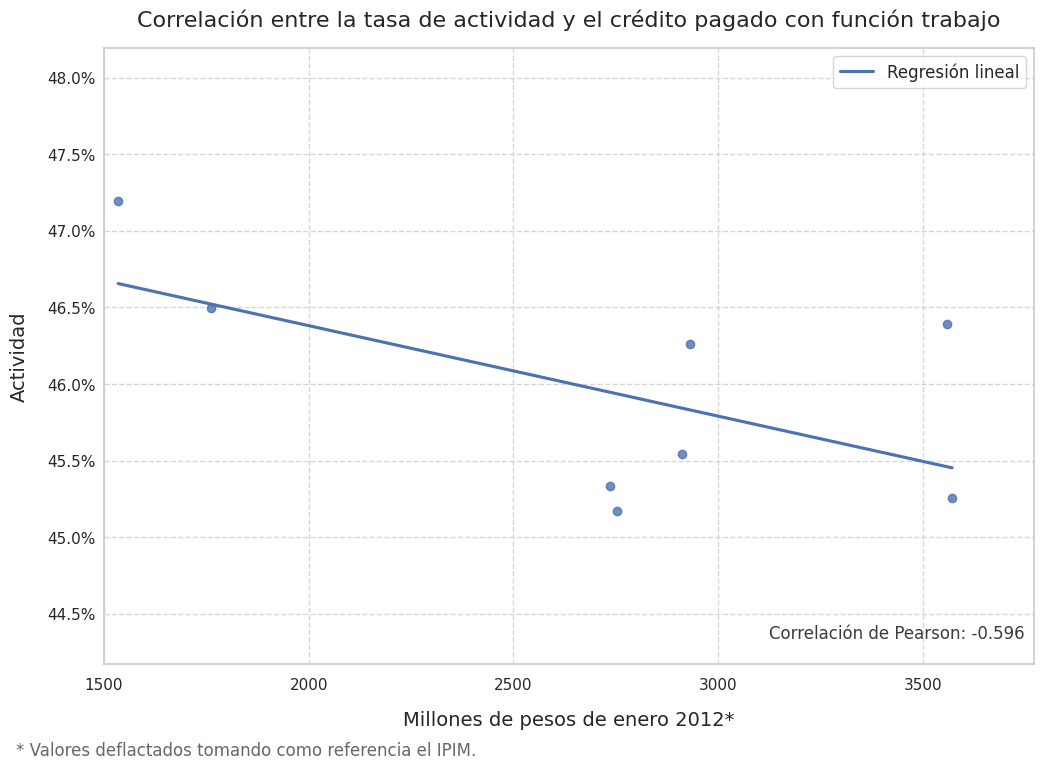

In [8]:
for tasa in tasas:
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 8))
    plt.grid(True, linestyle='--', alpha=0.8)

    ax = sns.regplot(x=porcentajes, y=tasa, marker='o', ci=None,
                     line_kws={"label": "Regresión lineal"})
    ax.set_title(f'Correlación entre la tasa de {
                 tasa.name.lower()} y el crédito pagado con función trabajo', fontsize=16,pad=15)
    ax.set_xlabel('Millones de pesos de enero 2012*', fontsize=14,labelpad=13)
    ax.set_xlim(1500, max(porcentajes) + 200)
    ax.set_ylabel(f'{tasa.name}', fontsize=14,labelpad=13)
    ax.set_ylim(min(tasa) - 1, max(tasa) + 1)

    plt.text(0.99, 0.05, f'Correlación de Pearson: {correlaciones[tasa.name]:.3f}',
             ha='right', va='center', transform=ax.transAxes, fontsize=12, alpha=0.9)

    plt.text(0.4, -0.14, '* Valores deflactados tomando como referencia el IPIM.',
             ha='right', va='center', transform=ax.transAxes, fontsize=12, alpha=0.7)

    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}%'))
    ax.yaxis.set_tick_params(pad=0.05)

    ax.legend(fontsize='12')
    plt.savefig(f'plots/cruce_eph_presupuesto/correlacion_{tasa.name.lower()}_credito_pagado_trabajo.png',
                bbox_inches='tight')
    plt.show()